In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [12]:
# Function to load images and extract features
def load_images_and_extract_features(data_dir, image_size=(512, 512)):
    features = []
    labels = []
    
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith(".jpeg"):
                    image_path = os.path.join(folder_path, file)
                    
                    # Load images with grayscale
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    
                    # Resize images
                    image = cv2.resize(image, image_size)
                    
                    features.append(image)
                    labels.append(folder)

    features = np.array(features)
    labels = np.array(labels)
    return features, labels

# Load images and extract features
data_dir = "/kaggle/input/images-v1"
X, y = load_images_and_extract_features(data_dir)

In [14]:
# Convert string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
y

array(['cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'cidox',
       'cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'cidox',
       'cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'cidox', 'darbyen',
       'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen',
       'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen',
       'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen', 'darbyen',
       'darbyen', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk',
       'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk',
       'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk', 'cpllnk',
       'cpllnk', 'cpllnk', 'cpllnk', 'adclicer', 'adclicer', 'adclicer',
       'adclicer', 'adclicer', 'adclicer', 'adclicer', 'adclicer',
       'adclicer', 'adclicer', 'adclicer', 'adclicer', 'adclicer',
       'adclicer', 'adclicer', 'adclicer', 'adclicer', 'adclicer',
       'adclicer', 'adclicer', '1clickdownload', '1clickdownload',
       '1clickdownload', '

In [15]:
y_encoded

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  4,
        4,  4,  4,  4,  4

In [45]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=35)

# Normalize pixel values and reshape to include the channel dimension for grayscale images
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

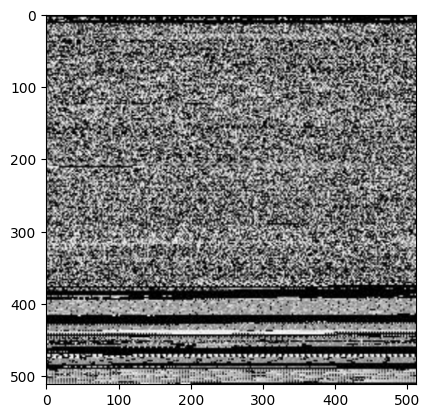

In [28]:
plt.figure()
plt.imshow(X_test[3:4][0], cmap='gray', vmin=0, vmax=1)

In [41]:
X_train.shape

(360, 512, 512, 1)

In [42]:
X_test.shape

(40, 512, 512, 1)

In [9]:
len(np.unique(y_encoded))

20

In [46]:
# Define a simpler model architecture for grayscale images
def create_simple_model():
    input_layer = layers.Input(shape=(512, 512, 1))
    conv1 = layers.Conv2D(32, (3, 3), activation='relu')(input_layer)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(64, activation='relu')(flatten)
    output = layers.Dense(len(np.unique(y_encoded)), activation='softmax')(dense1)
    model = models.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [49]:
# Train the simpler model
simple_model = create_simple_model()
history = simple_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 7s/step - accuracy: 0.0509 - loss: 24.9577 - val_accuracy: 0.2250 - val_loss: 2.7869
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.2947 - loss: 2.5576 - val_accuracy: 0.4750 - val_loss: 1.8720
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.6199 - loss: 1.3124 - val_accuracy: 0.6750 - val_loss: 1.4084
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.8213 - loss: 0.6091 - val_accuracy: 0.7250 - val_loss: 1.5687
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.9292 - loss: 0.3520 - val_accuracy: 0.7000 - val_loss: 1.3712
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.9784 - loss: 0.1856 - val_accuracy: 0.6750 - val_loss: 1.7474
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.9567 - loss: 0.0940 - val_accuracy: 0.8000 - val_loss: 1.2594
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.9751 - loss: 0.0545 - val_accuracy: 0.8000 - val_loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.8104 - loss: 1.2948
Test Accuracy: 0.824999988079071


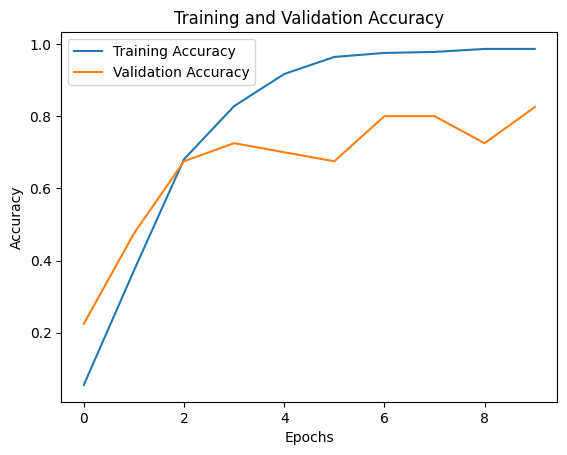

In [50]:
# Evaluate the simpler model
test_loss, test_accuracy = simple_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [62]:
# FGSM 攻擊方法
def fgsm_attack(model, image, label, epsilon):
    # convert image to tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.int64)
    
    # record gradients
    with tf.GradientTape() as tape:
        # watch for updates on the image
        tape.watch(image)
        
        # use the model to predict the image
        prediction = model(image)
        # compute the loss
        loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)
    
    # calculate the gradient of loss with respect to the image
    gradient = tape.gradient(loss, image)
    
    # compute signed gradient
    signed_grad = tf.sign(gradient)
    adversarial_image = (image + (epsilon * signed_grad))
    
    # clip value between 0 and 1
    adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)
    
#     # show noise
#     plt.figure()
#     plt.imshow((epsilon * signed_grad)[0], cmap='gray', vmin=0, vmax=1)
#     plt.title("noise")
#     plt.show()
    
    return adversarial_image

correct label: [12]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


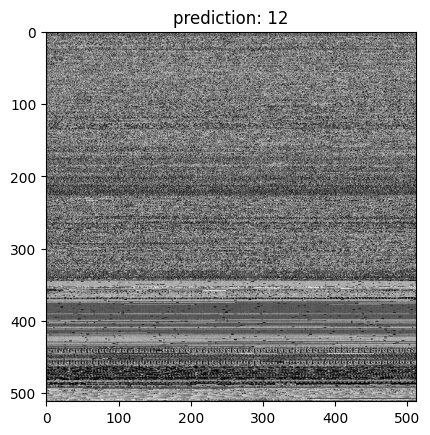

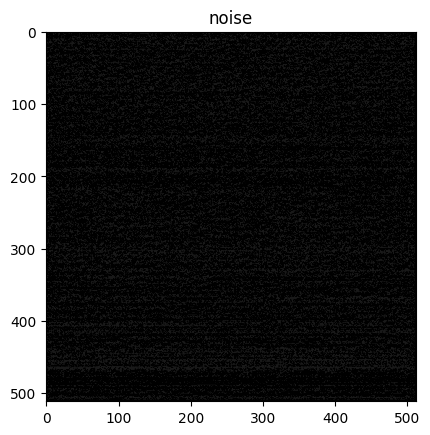

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


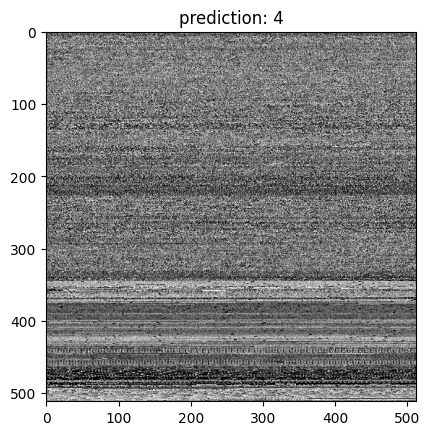

In [60]:
epsilon = 0.1

for i in np.random.choice(np.arange(0, len(X_test)), size=(1,)):
    print("correct label: {}".format(y_test[i:i+1]))
    
    img_pred = simple_model.predict(X_test[i:i+1])
    plt.figure()
    plt.imshow(X_test[i:i+1][0], cmap='gray', vmin=0, vmax=1)
    plt.title("prediction: {}".format(img_pred[0].argmax()))
    plt.show()
    
    adversary = fgsm_attack(simple_model, X_test[i:i+1], y_test[i:i+1], epsilon)
    adv_pred = simple_model.predict(adversary)
    plt.figure()
    plt.imshow(adversary[0], cmap='gray', vmin=0, vmax=1)
    plt.title("prediction: {}".format(adv_pred[0].argmax()))
    plt.show()

In [63]:
# 生成對抗性樣本並評估模型性能
epsilon = 0.1

# 在測試集上生成對抗性樣本
X_test_adv = np.zeros_like(X_test)
for i in range(len(X_test)):
    adv_image = fgsm_attack(simple_model, X_test[i:i+1], y_test[i:i+1], epsilon)
    X_test_adv[i] = adv_image.numpy()

In [15]:
# 評估模型在對抗性樣本上的性能
test_loss_adv, test_accuracy_adv = simple_model.evaluate(X_test_adv, y_test)
print("Test Accuracy on Adversarial Examples:", test_accuracy_adv)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.0979 - loss: 23.3552
Test Accuracy on Adversarial Examples: 0.10000000149011612


In [66]:
# 將對抗性樣本加入訓練數據
X_train_adv = np.zeros_like(X_train)
for i in range(len(X_train)):
    adv_image = fgsm_attack(simple_model, X_train[i:i+1], y_train[i:i+1], 0.1)
    X_train_adv[i] = adv_image.numpy()

X_train_augmented = np.concatenate([X_train, X_train_adv])
y_train_augmented = np.concatenate([y_train, y_train])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 152s 6s/step - accuracy: 0.1194 - loss: 17.7000 - val_accuracy: 0.4250 - val_loss: 1.9761
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 208s 7s/step - accuracy: 0.5988 - loss: 1.4510 - val_accuracy: 0.7000 - val_loss: 1.5565
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - accuracy: 0.8672 - loss: 0.5799 - val_accuracy: 0.6000 - val_loss: 2.5920
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 202s 6s/step - accuracy: 0.9209 - loss: 0.2922 - val_accuracy: 0.5750 - val_loss: 1.6629
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step - accuracy: 0.9854 - loss: 0.0846 - val_accuracy: 0.6500 - val_loss: 1.5275
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.9884 - loss: 0.0321 - val_accuracy: 0.7750 - val_loss: 1.1890
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 204s 7s/step - accuracy: 0.9982 - loss: 0.0177 - val_accuracy: 0.7000 - val_loss: 1.4473
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.7250 - 

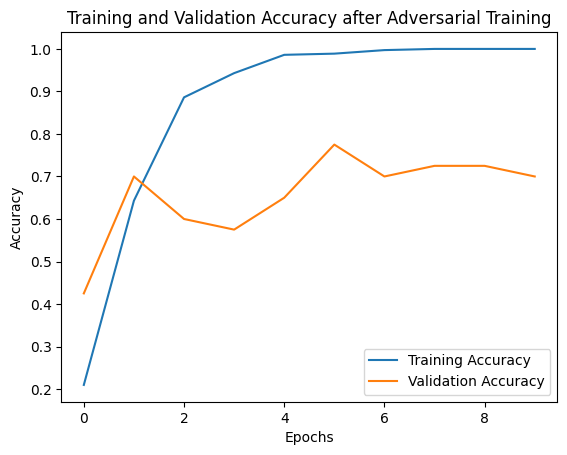

In [67]:
# 重新訓練模型
simple_model_adv = create_simple_model()
history_adv = simple_model_adv.fit(X_train_augmented, y_train_augmented, epochs=10, validation_data=(X_test, y_test))

# 評估經過對抗性訓練後的模型
test_loss_adv_trained, test_accuracy_adv_trained = simple_model_adv.evaluate(X_test, y_test)
print("Test Accuracy on Adversarial Examples after Adversarial Training:", test_accuracy_adv_trained)

# 繪製訓練和驗證準確率
plt.plot(history_adv.history['accuracy'], label='Training Accuracy')
plt.plot(history_adv.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy after Adversarial Training')
plt.legend()
plt.show()